In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
growth_ary = np.loadtxt("data/growth.dat.txt", dtype=float, skiprows=6, encoding="utf-8-sig")  #1
growth_ary[:5]  #2

array([[  0. , 143. ,  56.3,  85. ],
       [  0. , 155. ,  62.3, 105. ],
       [  0. , 153. ,  63.3, 108. ],
       [  0. , 161. ,  59. ,  92. ],
       [  0. , 191. ,  62.5, 112.5]])

In [17]:
growth_ary = growth_ary.copy()
growth_ary[:,1] = growth_ary[:,1] / 12.0
growth_ary[:,2] = growth_ary[:,2] * 2.54
growth_ary[:,3] = growth_ary[:,3] * 0.45359237
np.round(growth_ary[:5], 3) #3

array([[  0.   ,  11.917, 143.002,  38.555],
       [  0.   ,  12.917, 158.242,  47.627],
       [  0.   ,  12.75 , 160.782,  48.988],
       [  0.   ,  13.417, 149.86 ,  41.73 ],
       [  0.   ,  15.917, 158.75 ,  51.029]])

In [18]:
height_m = growth_ary[:, 2] / 100.0
weight_kg = growth_ary[:, 3]
bmi = weight_kg / (height_m ** 2)
bmi

array([18.85386718, 19.02004382, 18.95023687, 18.5815574 , 20.24840389,
       20.15841099, 21.00523881, 15.19674242, 17.28409867, 16.63888911,
       19.33220604, 19.23926274, 20.87112387, 19.23730127, 13.4913359 ,
       18.09812826, 17.64232111, 15.58956627, 21.51667691, 20.0030278 ,
       15.64733148, 19.89645766, 17.45134064, 20.9553723 , 17.72198077,
       19.23926274, 17.7829071 , 22.62102641, 22.94265862, 18.52115188,
       15.30449032, 17.55583968, 18.79051311, 20.41426984, 19.99246   ,
       22.49227818, 18.02375581, 26.23229101, 19.45601767, 21.61610734,
       18.27270678, 17.89418636, 17.65922667, 18.01570073, 17.5875446 ,
       19.56347364, 16.01416089, 16.61317532, 18.56846429, 20.9553723 ,
       25.89269826, 18.75280848, 21.28738449, 18.48057068, 16.93523287,
       17.67754358, 20.0198646 , 16.75575289, 18.62046322, 19.17306864,
       17.32218783, 20.70149318, 17.07938557, 23.06407625, 22.26387002,
       17.75278797, 16.59652821, 16.66827399, 20.16865128, 19.91

In [6]:
growth_ary = np.column_stack((growth_ary, bmi))
growth_ary[:5]  #4

array([[  0.        ,  11.91666667, 143.002     ,  38.55535145,
         18.85386718],
       [  0.        ,  12.91666667, 158.242     ,  47.62719885,
         19.02004382],
       [  0.        ,  12.75      , 160.782     ,  48.98797596,
         18.95023687],
       [  0.        ,  13.41666667, 149.86      ,  41.73049804,
         18.5815574 ],
       [  0.        ,  15.91666667, 158.75      ,  51.02914163,
         20.24840389]])

In [7]:
bmi_vals = growth_ary[:, 4]
n = bmi_vals.size
under = (bmi_vals < 18.5).sum() / n * 100
normal = ((bmi_vals >= 18.5) & (bmi_vals < 23)).sum() / n * 100
over = ((bmi_vals >= 23) & (bmi_vals < 25)).sum() / n * 100
obese = ((bmi_vals >= 25) & (bmi_vals < 30)).sum() / n * 100
severe = (bmi_vals >= 30).sum() / n * 100
print(f"저체중: {under:.2f}%, 정상: {normal:.2f}%, 과체충: {over:.2f}%, 비만: {obese:.2f}%, 고도비만: {severe:.2f}%") #5

저체중: 48.95%, 정상: 46.41%, 과체충: 2.95%, 비만: 1.69%, 고도비만: 0.00%


In [8]:
sex = growth_ary[:, 0].astype(int)
male = sex == 1
female = sex == 0
obese_mask = bmi_vals >= 25.0
male_rate = obese_mask[male].sum() / male.sum() * 100
female_rate = obese_mask[female].sum() / female.sum() * 100
print (f"남학생 비만율: {male_rate:.2f}%, 여학생 비만율: {female_rate:.2f}%")   #6

남학생 비만율: 1.59%, 여학생 비만율: 1.80%


In [9]:
r_male = float(np.corrcoef(growth_ary[male, 1], growth_ary[male, 2])[0, 1])
r_female = float(np.corrcoef(growth_ary[female,1], growth_ary[female, 2])[0, 1])
print(f"남학생 나이와 키와의 상관계수: {r_male:.4f}, 여학생 나이와 키와의 상관계수: {r_female:.4f}")    #7

남학생 상관계수 r: 0.7466, 여학생 상관계수 r: 0.5439


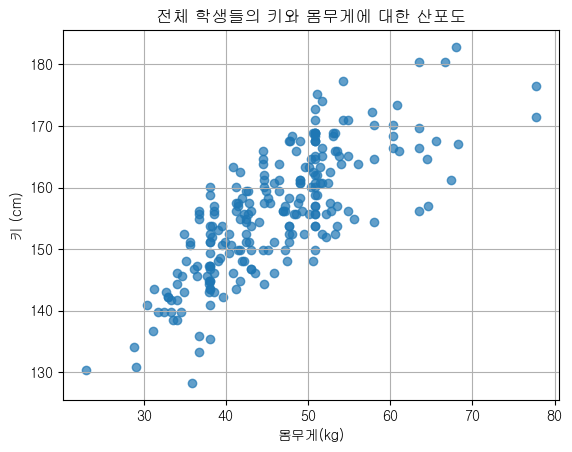

In [10]:
import matplotlib
matplotlib.rcParams["font.family"] = "gulim"
plt.figure()
plt.scatter(weight_kg, growth_ary[:, 2], alpha=0.7)
plt.title("전체 학생들의 키와 몸무게에 대한 산포도")
plt.xlabel("몸무게(kg)")
plt.ylabel("키 (cm)")
plt.grid()
plt.show()     #8

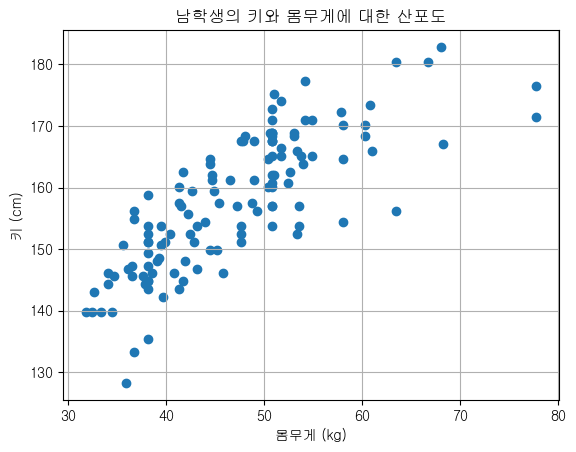

In [12]:
plt.figure()
plt.scatter(weight_kg[male], growth_ary[male, 2])
plt.title("남학생의 키와 몸무게에 대한 산포도")
plt.xlabel("몸무게 (kg)")
plt.ylabel("키 (cm)")
plt.grid()
plt.show()  #9(남)

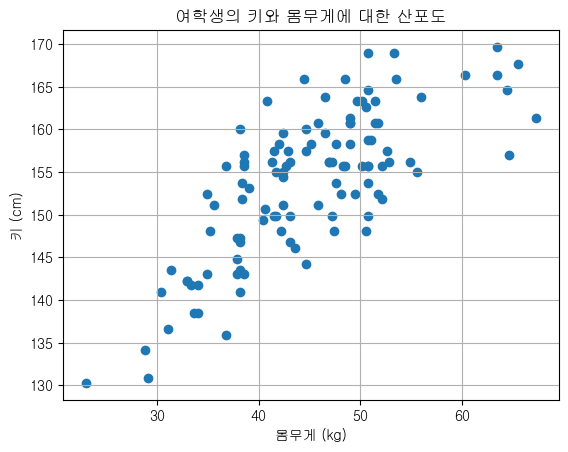

In [14]:
plt.figure()
plt.scatter(weight_kg[female], growth_ary[female, 2])
plt.title("여학생의 키와 몸무게에 대한 산포도")
plt.xlabel("몸무게 (kg)")
plt.ylabel("키 (cm)")
plt.grid()
plt.show()  #9(여)